# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [165]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))
    print ('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

#leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df[(df['Date'].dt.month != 2) | (df['Date'].dt.day != 29)]

df_others = (df[df['Date'].dt.year != 2015]
             .groupby([df['Date'].dt.month,df['Date'].dt.day])
             .agg({'Data_Value':['min','max']})
             .set_index(np.arange(0,365)))

df_2015 = (df[df['Date'].dt.year == 2015]
             .groupby([df['Date'].dt.month,df['Date'].dt.day])
             .agg({'Data_Value':['min','max']})
             .set_index(np.arange(0,365)))

df_all = df_2015.merge(df_others,left_index=True,right_index=True, suffixes=('_2015','_others'))

df_2015_high = df_all[df_all['Data_Value_2015']['max']>df_all['Data_Value_others']['max']]['Data_Value_2015']['max']
df_2015_low = df_all[df_all['Data_Value_2015']['min']<df_all['Data_Value_others']['min']]['Data_Value_2015']['min']
df_2015_high

39      83
106    278
126    306
127    333
130    306
137    317
207    339
209    361
230    328
249    350
250    339
258    311
259    317
260    300
270    294
271    283
292    272
305    228
306    261
307    261
308    256
309    239
321    200
340    100
341    100
342    122
343    150
344    156
345    200
346    194
347    183
348    161
349    150
356    183
357    172
358    111
359    117
Name: max, dtype: int64

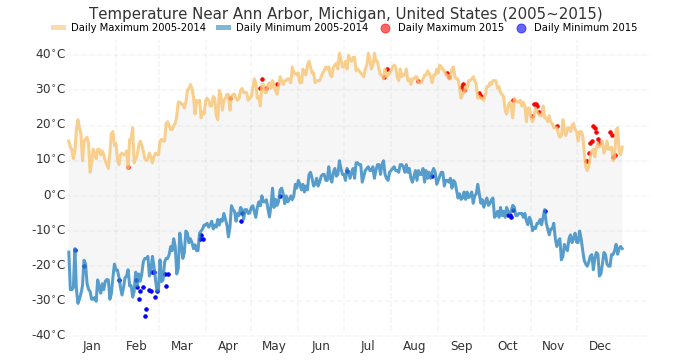

In [121]:
fig = plt.figure(figsize=(12,6))
line_high = plt.plot(df_all.index, df_all['Data_Value_others']['max'],label='Daily Maximum 2005-2014', c='#F8C471',linestyle='-',lw=3,alpha=0.8)
line_low = plt.plot(df_all.index, df_all['Data_Value_others']['min'], label='Daily Minimum 2005-2014', c='#2E86C1',linestyle='-',lw=3,alpha=0.8)
plt.gca().fill_between(df_all.index, df_all['Data_Value_others']['max'], df_all['Data_Value_others']['min'], facecolor='lightgrey',alpha=0.2)
plt.scatter(df_2015_high.index,df_2015_high, label='Daily Maximum 2015', c='r',s=12)
plt.scatter(df_2015_low.index,df_2015_low,label='Daily Minimum 2015', c='b',s=12)

ax = plt.gca()

month_day = [0] + list(np.cumsum(pd.date_range('2005-01-01', periods=12, freq='M').map(lambda d: d.day)))
day_anno_pos = list(map(np.mean, zip(month_day[: -1], month_day[1: ])))
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.vlines(month_day[1:-1], *ax.get_ylim(), color='k', linestyles='--', lw=0.3, alpha=0.2)
for pos, text in zip(day_anno_pos, month_label):
    ax.annotate(s=text, xy =(pos, -410), xycoords='data', alpha=0.8, size=12,
                verticalalignment='top', horizontalalignment='center' , rotation=0)


temp_anno_pos = [-400,-300, -200, -100, 0, 100, 200, 300, 400]
temp_anno_label = list(map(lambda t: '{}$^{{\circ}}$C'.format(int(t/10)), temp_anno_pos))
plt.hlines(temp_anno_pos, *ax.get_xlim(), color='k', linestyles='--', lw=0.3, alpha=0.2)
for pos, text in zip(temp_anno_pos, temp_anno_label):
    ax.annotate(s=text, xy =(-2, pos), xycoords='data', alpha=0.8, size=12,
                verticalalignment='center', horizontalalignment='right' , rotation=0)


plt.title('Temperature Near Ann Arbor, Michigan, United States (2005~2015)',size=15, alpha=0.8)

plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')

for spine in ax.spines.values():
    spine.set_visible(False)

legend = plt.legend(bbox_to_anchor=(0.05, .95, 0.9, .95), loc=3, ncol=4, mode='expand',
                    handlelength=1, scatterpoints=1)
legend.get_frame().set_alpha(0)
for legend_line in legend.get_lines():
    legend_line.set_lw(5)
for scatter_legend in legend.legendHandles:
    scatter_legend._sizes = [80]
    scatter_legend.set_alpha(0.6)

plt.show()
